**Goal of the Code:**
Create two plots, one for snow cover fraction over the whole year and one for snow cover fraction during boreal summer, JJA. Plotted is the 21-year running mean of each variable of the land region north of 50°N (y-axis) against the 21-year running mean of the global mean temperature T$_{glob}$ (x-axis) for all scenarios (RCP8.5, RCP4.5, CCT, MSB and SAI).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import iris
import iris.coord_categorisation
import matplotlib
import iris.analysis.cartography

Define function to calculate running mean of a time series where x = array and w = time span of running mean.

In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Check on which index soil liquid water + ice is.

Load the snow cover fraction and TS files. The region 74:96 represents everything North of 50°N. CCT03 starts 12 months after the other ensembles, hence why they start at 12. 

In [3]:
path = r"E:\Datasets_Geoengineering\JS_files_new_sel_var/"
path2 = r"E:\Datasets_Geoengineering\Snow_cover/"
path3 = r"E:\Datasets_Geoengineering\RCP45_variables/"
path4 = r"E:\Datasets_Geoengineering\JS_files_RCP_85/"

CCT_Ref_01 = iris.load(path + r"TS_01_sel_var_CCT_cam.all.nc")[0][12:,:,:]
CCT_Ref_02 = iris.load(path + r"TS_02_sel_var_CCT_cam.all.nc")[0][12:,:,:]
CCT_Ref_03 = iris.load(path + r"TS_03_sel_var_CCT_cam.all.nc")[0][:,:,:]

MSB_Ref_01 = iris.load(path + r"TS_01_sel_var_MSB_cam.all.nc")[0][:,:,:]
MSB_Ref_02 = iris.load(path + r"TS_02_sel_var_MSB_cam.all.nc")[0][:,:,:]
MSB_Ref_03 = iris.load(path + r"TS_03_sel_var_MSB_cam.all.nc")[0][:,:,:]

SAI_Ref_01 = iris.load(path + r"TS_01_sel_var_SAI_cam.all.nc")[0][:,:,:]
SAI_Ref_02 = iris.load(path + r"TS_02_sel_var_SAI_cam.all.nc")[0][:,:,:]
SAI_Ref_03 = iris.load(path + r"TS_03_sel_var_SAI_cam.all.nc")[0][:,:,:]

RCP45_Ref = iris.load(path3 + "TS_RCP45_cam.all.nc")[0][:,:,:] 
RCP_Ref = iris.load(path4 + "TS_sel_var_RCP85_cam.all.nc")[0][:,:,:] 


CCT_snow_01 = iris.load(path2 + r"RCP85_CCT_ens01_snow_cover.nc")[0][12:,74:96,:]
CCT_snow_02 = iris.load(path2 + r"RCP85_CCT_ens02_snow_cover.nc")[0][12:,74:96,:]
CCT_snow_03 = iris.load(path2 + r"RCP85_CCT_ens03_snow_cover.nc")[0][:,74:96,:]

MSB_snow_01 = iris.load(path2 + r"RCP85_MSB_ens01_snow_cover.nc")[0][:,74:96,:]
MSB_snow_02 = iris.load(path2 + r"RCP85_MSB_ens02_snow_cover.nc")[0][:,74:96,:]
MSB_snow_03 = iris.load(path2 + r"RCP85_MSB_ens03_snow_cover.nc")[0][:,74:96,:]

SAI_snow_01 = iris.load(path2 + r"RCP85_SAI_ens01_snow_cover.nc")[0][:,74:96,:]
SAI_snow_02 = iris.load(path2 + r"RCP85_SAI_ens02_snow_cover.nc")[0][:,74:96,:]
SAI_snow_03 = iris.load(path2 + r"RCP85_SAI_ens03_snow_cover.nc")[0][:,74:96,:]

RCP45_snow_01 = iris.load(path2 + r"RCP45_ens01_snow_cover.nc")[0][:,74:96,:]
RCP_snow_01 = iris.load(path2 + r"RCP85_ens01_snow_cover.nc")[0][:,74:96,:]



C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\fileformats\_nc_load_rules\helpers.py:645: UserWarning: Ignoring netCDF variable 'FSNO' invalid units 'unitless'
  warnings.warn(msg)
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\fileformats\_nc_load_rules\helpers.py:645: UserWarning: Ignoring netCDF variable 'FSNO' invalid units 'unitless'
  warnings.warn(msg)
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\fileformats\_nc_load_rules\helpers.py:645: UserWarning: Ignoring netCDF variable 'FSNO' invalid units 'unitless'
  warnings.warn(msg)
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\fileformats\_nc_load_rules\helpers.py:645: UserWarning: Ignoring netCDF variable 'FSNO' invalid units 'unitless'
  warnings.warn(msg)
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\fileformats\_nc_load_rules\helpers.py:645: UserWarning: Ignoring netCDF variable 'FSNO' invalid units 'unitless'
  warnings.warn(msg)
C:\Users\rhonda\anaconda3\envs\py3k

Create a cosine weighted mean of the loaded area for each dataset.

In [4]:
import warnings
warnings.filterwarnings("ignore") ## To ignore UserWarning about collapsing a non-contagious variable

## snow
CCT_01_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_snow_01)
CCT_snow_01_weigh_mean = CCT_snow_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_01_weigh).data 
CCT_02_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_snow_02)
CCT_snow_02_weigh_mean = CCT_snow_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_02_weigh).data
CCT_03_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_snow_03)
CCT_snow_03_weigh_mean = CCT_snow_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_03_weigh).data

MSB_01_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_snow_01)
MSB_snow_01_weigh_mean = MSB_snow_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_01_weigh).data 
MSB_02_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_snow_02)
MSB_snow_02_weigh_mean = MSB_snow_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_02_weigh).data 
MSB_03_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_snow_03)
MSB_snow_03_weigh_mean = MSB_snow_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_03_weigh).data 

SAI_01_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_snow_01)
SAI_snow_01_weigh_mean = SAI_snow_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_01_weigh).data 
SAI_02_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_snow_02)
SAI_snow_02_weigh_mean = SAI_snow_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_02_weigh).data 
SAI_03_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_snow_03)
SAI_snow_03_weigh_mean = SAI_snow_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_03_weigh).data 

RCP45_01_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP45_snow_01)
RCP45_snow_01_weigh_mean = RCP45_snow_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP45_01_weigh).data

RCP_01_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP_snow_01)
RCP_snow_01_weigh_mean = RCP_snow_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP_01_weigh).data

## Tglob (= land and ocean)
CCT_Ref_01_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_Ref_01)
CCT_Ref_01_weigh_mean = CCT_Ref_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_Ref_01_weigh).data 
CCT_Ref_02_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_Ref_02)
CCT_Ref_02_weigh_mean = CCT_Ref_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_Ref_02_weigh).data 
CCT_Ref_03_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_Ref_03)
CCT_Ref_03_weigh_mean = CCT_Ref_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_Ref_03_weigh).data 

MSB_Ref_01_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_Ref_01)
MSB_Ref_01_weigh_mean = MSB_Ref_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_Ref_01_weigh).data 
MSB_Ref_02_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_Ref_02)
MSB_Ref_02_weigh_mean = MSB_Ref_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_Ref_02_weigh).data 
MSB_Ref_03_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_Ref_03)
MSB_Ref_03_weigh_mean = MSB_Ref_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_Ref_03_weigh).data 

SAI_Ref_01_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_Ref_01)
SAI_Ref_01_weigh_mean = SAI_Ref_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_Ref_01_weigh).data 
SAI_Ref_02_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_Ref_02)
SAI_Ref_02_weigh_mean = SAI_Ref_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_Ref_02_weigh).data 
SAI_Ref_03_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_Ref_03)
SAI_Ref_03_weigh_mean = SAI_Ref_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_Ref_03_weigh).data 

RCP45_Ref_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP45_Ref)
RCP45_Ref_weigh_mean = RCP45_Ref.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP45_Ref_weigh).data 

RCP_Ref_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP_Ref)
RCP_Ref_weigh_mean = RCP_Ref.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP_Ref_weigh).data 


CCT and MSB have a missing month in the second ensembles in all cam datasets. The missing month is at [264] in CCT02 and [531] in MSB02. Hence, for this position, the mean of the other two ensembles is calculated and inserted instead.

In [5]:
## Tglob (cam)
CCT_Ref_02_array = (CCT_Ref_02_weigh_mean.data)
CCT_Ref_02_list = CCT_Ref_02_array.tolist()
CCT_Ref_02_list.insert(264-12, (CCT_Ref_01_weigh_mean[264-12] + CCT_Ref_03_weigh_mean[264-12]) / 2) ## 264 - 12 since we start CCT02 from 12 and not from 0
CCT_Ref_01_array = CCT_Ref_01_weigh_mean.data
CCT_Ref_01_list = CCT_Ref_01_array.tolist()
CCT_Ref_03_array = CCT_Ref_03_weigh_mean.data
CCT_Ref_03_list = CCT_Ref_03_array.tolist()

MSB_Ref_02_array = (MSB_Ref_02_weigh_mean.data)
MSB_Ref_02_list = MSB_Ref_02_array.tolist()
MSB_Ref_02_list.insert(531, (MSB_Ref_01_weigh_mean[531] + MSB_Ref_03_weigh_mean[531]) / 2)
MSB_Ref_01_array = MSB_Ref_01_weigh_mean.data
MSB_Ref_01_list = MSB_Ref_01_array.tolist()
MSB_Ref_03_array = MSB_Ref_03_weigh_mean.data
MSB_Ref_03_list = MSB_Ref_03_array.tolist()

Calculate the global and boreal summer mean. CCT has 960 months, SAI and MSB 972 months and RCP8.5&RCP4.5 1140 months.

In [6]:
CCT_01_year_snow = []
CCT_02_year_snow = []
CCT_03_year_snow = []
CCT_01_year_snow_JJA = []
CCT_02_year_snow_JJA = []
CCT_03_year_snow_JJA = []
CCT_01_year_Ref = []
CCT_02_year_Ref = []
CCT_03_year_Ref = []

i = 0
while i in range(0,960):
    CCT_01_year_snow.append(np.mean(CCT_snow_01_weigh_mean[i:i+12].data))
    CCT_02_year_snow.append(np.mean(CCT_snow_02_weigh_mean[i:i+12].data))
    CCT_03_year_snow.append(np.mean(CCT_snow_03_weigh_mean[i:i+12].data))
    
    CCT_01_year_snow_JJA.append(np.mean(CCT_snow_01_weigh_mean[i+5:i+8].data))
    CCT_02_year_snow_JJA.append(np.mean(CCT_snow_02_weigh_mean[i+5:i+8].data))
    CCT_03_year_snow_JJA.append(np.mean(CCT_snow_03_weigh_mean[i+5:i+8].data))
    
    CCT_01_year_Ref.append(np.mean(CCT_Ref_01_list[i:i+12]))
    CCT_02_year_Ref.append(np.mean(CCT_Ref_02_list[i:i+12]))
    CCT_03_year_Ref.append(np.mean(CCT_Ref_03_list[i:i+12]))
    i = i + 12
    
MSB_01_year_snow = []
MSB_02_year_snow = []
MSB_03_year_snow = []
SAI_01_year_snow = []
SAI_02_year_snow = []
SAI_03_year_snow = []
MSB_01_year_snow_JJA = []
MSB_02_year_snow_JJA = []
MSB_03_year_snow_JJA = []
SAI_01_year_snow_JJA = []
SAI_02_year_snow_JJA = []
SAI_03_year_snow_JJA = []
MSB_01_year_Ref = []
MSB_02_year_Ref = []
MSB_03_year_Ref = []
SAI_01_year_Ref = []
SAI_02_year_Ref = []
SAI_03_year_Ref = []

i = 0
while i in range(0,972):
    MSB_01_year_snow.append(np.mean(MSB_snow_01_weigh_mean[i:i+12].data))
    MSB_02_year_snow.append(np.mean(MSB_snow_02_weigh_mean[i:i+12].data))
    MSB_03_year_snow.append(np.mean(MSB_snow_03_weigh_mean[i:i+12].data))
    SAI_01_year_snow.append(np.mean(SAI_snow_01_weigh_mean[i:i+12].data))
    SAI_02_year_snow.append(np.mean(SAI_snow_02_weigh_mean[i:i+12].data))
    SAI_03_year_snow.append(np.mean(SAI_snow_03_weigh_mean[i:i+12].data))
    
    MSB_01_year_snow_JJA.append(np.mean(MSB_snow_01_weigh_mean[i+5:i+8].data))
    MSB_02_year_snow_JJA.append(np.mean(MSB_snow_02_weigh_mean[i+5:i+8].data))
    MSB_03_year_snow_JJA.append(np.mean(MSB_snow_03_weigh_mean[i+5:i+8].data))
    SAI_01_year_snow_JJA.append(np.mean(SAI_snow_01_weigh_mean[i+5:i+8].data))
    SAI_02_year_snow_JJA.append(np.mean(SAI_snow_02_weigh_mean[i+5:i+8].data))
    SAI_03_year_snow_JJA.append(np.mean(SAI_snow_03_weigh_mean[i+5:i+8].data))
    
    MSB_01_year_Ref.append(np.mean(MSB_Ref_01_list[i:i+12]))
    MSB_02_year_Ref.append(np.mean(MSB_Ref_02_list[i:i+12]))
    MSB_03_year_Ref.append(np.mean(MSB_Ref_03_list[i:i+12]))
    SAI_01_year_Ref.append(np.mean(SAI_Ref_01_weigh_mean[i:i+12].data))
    SAI_02_year_Ref.append(np.mean(SAI_Ref_01_weigh_mean[i:i+12].data))
    SAI_03_year_Ref.append(np.mean(SAI_Ref_01_weigh_mean[i:i+12].data))
    i = i + 12

RCP_01_year_snow = []
RCP_01_year_Ref = []
RCP_01_year_snow_JJA = []

i = 0
while i in range(0,1140-168):
    RCP_01_year_snow.append(np.mean(RCP_snow_01_weigh_mean[i:i+12].data))
    RCP_01_year_snow_JJA.append(np.mean(RCP_snow_01_weigh_mean[i+5:i+8].data))
    RCP_01_year_Ref.append(np.mean(RCP_Ref_weigh_mean[i+168:i+12+168].data)) # So that RCP starts in 2020
    i = i + 12
    
RCP45_01_year_snow = []
RCP45_01_year_Ref = []
RCP45_01_year_snow_JJA = []

i = 0
while i in range(0,1140-168):
    RCP45_01_year_snow.append(np.mean(RCP45_snow_01_weigh_mean[i:i+12].data))
    RCP45_01_year_snow_JJA.append(np.mean(RCP45_snow_01_weigh_mean[i+5:i+8].data))
    RCP45_01_year_Ref.append(np.mean(RCP45_Ref_weigh_mean[i+168:i+12+168].data)) # So that RCP starts in 2020
    i = i + 12

Calculate the 21-year running mean for each dataset.

In [7]:
CCT_snow_roll_mean_01 = moving_average(CCT_01_year_snow, 21)
CCT_snow_roll_mean_02 = moving_average(CCT_02_year_snow, 21)
CCT_snow_roll_mean_03 = moving_average(CCT_03_year_snow, 21)
MSB_snow_roll_mean_01 = moving_average(MSB_01_year_snow, 21)
MSB_snow_roll_mean_02 = moving_average(MSB_02_year_snow, 21)
MSB_snow_roll_mean_03 = moving_average(MSB_03_year_snow, 21)
SAI_snow_roll_mean_01 = moving_average(SAI_01_year_snow, 21)
SAI_snow_roll_mean_02 = moving_average(SAI_02_year_snow, 21)
SAI_snow_roll_mean_03 = moving_average(SAI_03_year_snow, 21)
RCP45_snow_roll_mean = moving_average(RCP45_01_year_snow, 21)
RCP_snow_roll_mean = moving_average(RCP_01_year_snow, 21)

CCT_snow_JJA_roll_mean_01 = moving_average(CCT_01_year_snow_JJA, 21)
CCT_snow_JJA_roll_mean_02 = moving_average(CCT_02_year_snow_JJA, 21)
CCT_snow_JJA_roll_mean_03 = moving_average(CCT_03_year_snow_JJA, 21)
MSB_snow_JJA_roll_mean_01 = moving_average(MSB_01_year_snow_JJA, 21)
MSB_snow_JJA_roll_mean_02 = moving_average(MSB_02_year_snow_JJA, 21)
MSB_snow_JJA_roll_mean_03 = moving_average(MSB_03_year_snow_JJA, 21)
SAI_snow_JJA_roll_mean_01 = moving_average(SAI_01_year_snow_JJA, 21)
SAI_snow_JJA_roll_mean_02 = moving_average(SAI_02_year_snow_JJA, 21)
SAI_snow_JJA_roll_mean_03 = moving_average(SAI_03_year_snow_JJA, 21)
RCP45_snow_JJA_roll_mean = moving_average(RCP45_01_year_snow_JJA, 21)
RCP_snow_JJA_roll_mean = moving_average(RCP_01_year_snow_JJA, 21)

CCT_Ref_roll_mean_01 = moving_average(CCT_01_year_Ref, 21)
CCT_Ref_roll_mean_02 = moving_average(CCT_02_year_Ref, 21)
CCT_Ref_roll_mean_03 = moving_average(CCT_03_year_Ref, 21)
MSB_Ref_roll_mean_01 = moving_average(MSB_01_year_Ref, 21)
MSB_Ref_roll_mean_02 = moving_average(MSB_02_year_Ref, 21)
MSB_Ref_roll_mean_03 = moving_average(MSB_03_year_Ref, 21)
SAI_Ref_roll_mean_01 = moving_average(SAI_01_year_Ref, 21)
SAI_Ref_roll_mean_02 = moving_average(SAI_02_year_Ref, 21)
SAI_Ref_roll_mean_03 = moving_average(SAI_03_year_Ref, 21)
RCP45_Ref_roll_mean = moving_average(RCP45_01_year_Ref, 21)
RCP_Ref_roll_mean = moving_average(RCP_01_year_Ref, 21)

Calculate the mean of the three ensembles for CCT, MSB and SAI.

In [8]:
CCT_snow_mean = (CCT_snow_roll_mean_01 + CCT_snow_roll_mean_02 + CCT_snow_roll_mean_03) / 3
MSB_snow_mean = (MSB_snow_roll_mean_01 + MSB_snow_roll_mean_02 + MSB_snow_roll_mean_03) / 3
SAI_snow_mean = (SAI_snow_roll_mean_01 + SAI_snow_roll_mean_02 + SAI_snow_roll_mean_03) / 3

CCT_snow_JJA_mean = (CCT_snow_JJA_roll_mean_01 + CCT_snow_JJA_roll_mean_02 + CCT_snow_JJA_roll_mean_03) / 3
MSB_snow_JJA_mean = (MSB_snow_JJA_roll_mean_01 + MSB_snow_JJA_roll_mean_02 + MSB_snow_JJA_roll_mean_03) / 3
SAI_snow_JJA_mean = (SAI_snow_JJA_roll_mean_01 + SAI_snow_JJA_roll_mean_02 + SAI_snow_JJA_roll_mean_03) / 3

CCT_Ref_mean = (CCT_Ref_roll_mean_01 + CCT_Ref_roll_mean_02 + CCT_Ref_roll_mean_03) / 3
MSB_Ref_mean = (MSB_Ref_roll_mean_01 + MSB_Ref_roll_mean_02 + MSB_Ref_roll_mean_03) / 3
SAI_Ref_mean = (SAI_Ref_roll_mean_01 + SAI_Ref_roll_mean_02 + SAI_Ref_roll_mean_03) / 3

Calculate the anomalies based on the first 21 years of RCP8.5. 2020-2040 for snow cover fraction, 2006-2026 for T$_{glob}$.

In [9]:
CTT_snow_Anomaly = CCT_snow_mean - RCP_snow_roll_mean[0]
MSB_snow_Anomaly = MSB_snow_mean - RCP_snow_roll_mean[0]
SAI_snow_Anomaly = SAI_snow_mean - RCP_snow_roll_mean[0]
RCP45_snow_Anomaly = RCP45_snow_roll_mean - RCP_snow_roll_mean[0]
RCP_snow_Anomaly = RCP_snow_roll_mean - RCP_snow_roll_mean[0]

CTT_snow_JJA_Anomaly = CCT_snow_JJA_mean - RCP_snow_JJA_roll_mean[0]
MSB_snow_JJA_Anomaly = MSB_snow_JJA_mean - RCP_snow_JJA_roll_mean[0]
SAI_snow_JJA_Anomaly = SAI_snow_JJA_mean - RCP_snow_JJA_roll_mean[0]
RCP45_snow_JJA_Anomaly = RCP45_snow_JJA_roll_mean - RCP_snow_JJA_roll_mean[0]
RCP_snow_JJA_Anomaly = RCP_snow_JJA_roll_mean - RCP_snow_JJA_roll_mean[0]

i = 0
RCP_anomalie = []
while i in range(0,21*12):
    RCP_anomalie.append(np.mean(RCP_Ref_weigh_mean[i:i+12].data))
    i = i + 12
RCP_anomaly = moving_average(RCP_anomalie, 21)

CCT_Ref_Anomaly = CCT_Ref_mean - RCP_anomaly[0]
SAI_Ref_Anomaly = SAI_Ref_mean - RCP_anomaly[0]
MSB_Ref_Anomaly = MSB_Ref_mean - RCP_anomaly[0]
RCP_Ref_Anomaly = RCP_Ref_roll_mean - RCP_anomaly[0]
RCP45_Ref_Anomaly = RCP45_Ref_roll_mean - RCP_anomaly[0]

To fill the ensemble spread, the maximum and minimum as anomaly from RCP[0] for every index is calculated.

In [10]:
CCT_snow_max = []
CCT_snow_min = []
MSB_snow_max = []
MSB_snow_min = []
SAI_snow_max = []
SAI_snow_min = []

for i in range(0, len(CCT_snow_roll_mean_01)):
    CCT_snow_max.append(max(CCT_snow_roll_mean_01[i] - RCP_snow_roll_mean[0], CCT_snow_roll_mean_02[i] - RCP_snow_roll_mean[0], CCT_snow_roll_mean_03[i] - RCP_snow_roll_mean[0]))
    CCT_snow_min.append(min(CCT_snow_roll_mean_01[i] - RCP_snow_roll_mean[0], CCT_snow_roll_mean_02[i] - RCP_snow_roll_mean[0], CCT_snow_roll_mean_03[i] - RCP_snow_roll_mean[0]))    
for i in range(0, len(MSB_snow_roll_mean_01)):
    MSB_snow_max.append(max(MSB_snow_roll_mean_01[i]- RCP_snow_roll_mean[0], MSB_snow_roll_mean_02[i]- RCP_snow_roll_mean[0], MSB_snow_roll_mean_03[i]- RCP_snow_roll_mean[0]))
    MSB_snow_min.append(min(MSB_snow_roll_mean_01[i]- RCP_snow_roll_mean[0], MSB_snow_roll_mean_02[i]- RCP_snow_roll_mean[0], MSB_snow_roll_mean_03[i]- RCP_snow_roll_mean[0]))
    SAI_snow_max.append(max(SAI_snow_roll_mean_01[i]- RCP_snow_roll_mean[0], SAI_snow_roll_mean_02[i]- RCP_snow_roll_mean[0], SAI_snow_roll_mean_03[i]- RCP_snow_roll_mean[0]))
    SAI_snow_min.append(min(SAI_snow_roll_mean_01[i]- RCP_snow_roll_mean[0], SAI_snow_roll_mean_02[i]- RCP_snow_roll_mean[0], SAI_snow_roll_mean_03[i]- RCP_snow_roll_mean[0]))

CCT_snow_JJA_max = []
CCT_snow_JJA_min = []
MSB_snow_JJA_max = []
MSB_snow_JJA_min = []
SAI_snow_JJA_max = []
SAI_snow_JJA_min = []

for i in range(0, len(CCT_snow_JJA_roll_mean_01)):
    CCT_snow_JJA_max.append(max(CCT_snow_JJA_roll_mean_01[i] - RCP_snow_JJA_roll_mean[0], CCT_snow_JJA_roll_mean_02[i] - RCP_snow_JJA_roll_mean[0], CCT_snow_JJA_roll_mean_03[i] - RCP_snow_JJA_roll_mean[0]))
    CCT_snow_JJA_min.append(min(CCT_snow_JJA_roll_mean_01[i] - RCP_snow_JJA_roll_mean[0], CCT_snow_JJA_roll_mean_02[i] - RCP_snow_JJA_roll_mean[0], CCT_snow_JJA_roll_mean_03[i] - RCP_snow_JJA_roll_mean[0]))
for i in range(0, len(MSB_snow_JJA_roll_mean_01)):
    MSB_snow_JJA_max.append(max(MSB_snow_JJA_roll_mean_01[i]- RCP_snow_JJA_roll_mean[0], MSB_snow_JJA_roll_mean_02[i]- RCP_snow_JJA_roll_mean[0], MSB_snow_JJA_roll_mean_03[i]- RCP_snow_JJA_roll_mean[0]))
    MSB_snow_JJA_min.append(min(MSB_snow_JJA_roll_mean_01[i]- RCP_snow_JJA_roll_mean[0], MSB_snow_JJA_roll_mean_02[i]- RCP_snow_JJA_roll_mean[0], MSB_snow_JJA_roll_mean_03[i]- RCP_snow_JJA_roll_mean[0]))
    SAI_snow_JJA_max.append(max(SAI_snow_JJA_roll_mean_01[i]- RCP_snow_JJA_roll_mean[0], SAI_snow_JJA_roll_mean_02[i]- RCP_snow_JJA_roll_mean[0], SAI_snow_JJA_roll_mean_03[i]- RCP_snow_JJA_roll_mean[0]))
    SAI_snow_JJA_min.append(min(SAI_snow_JJA_roll_mean_01[i]- RCP_snow_JJA_roll_mean[0], SAI_snow_JJA_roll_mean_02[i]- RCP_snow_JJA_roll_mean[0], SAI_snow_JJA_roll_mean_03[i]- RCP_snow_JJA_roll_mean[0]))

Create plot with two subplots.

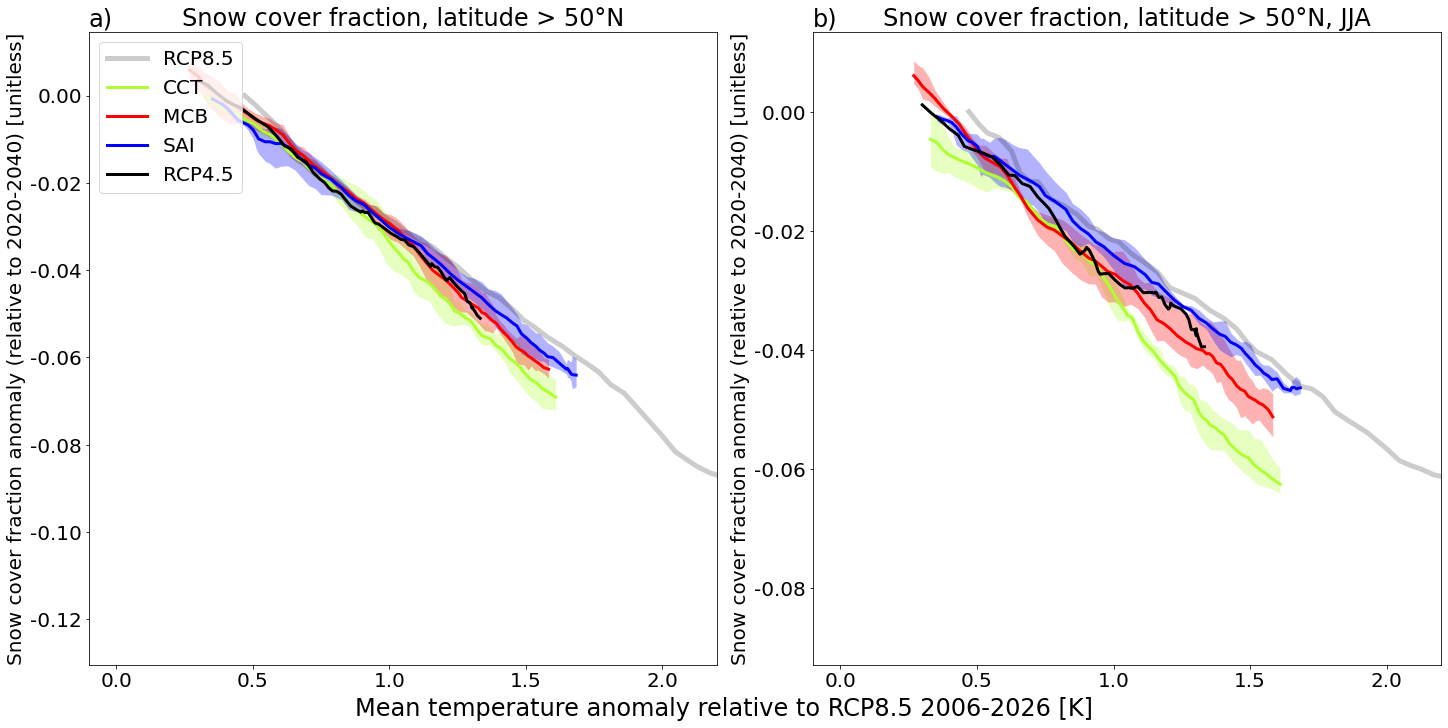

In [11]:
from matplotlib.ticker import FormatStrFormatter

matplotlib.rcParams.update({'font.size': 20})
fig, (ax1, ax2 ) = plt.subplots(1, 2,  sharex = True, figsize = (20,10), constrained_layout = True) # sharey = True,

plt.ylim = (-0.1, 7)
fig.supxlabel('Mean temperature anomaly relative to RCP8.5 2006-2026 [K]')

ax1.plot(RCP_Ref_Anomaly, RCP_snow_Anomaly, color = "black", label = "RCP8.5", linewidth=5.0, alpha = 0.2)


ax1.fill_between(CCT_Ref_Anomaly, CCT_snow_max, CCT_snow_min, color = "greenyellow", alpha = 0.3, lw=0)
ax1.fill_between(MSB_Ref_Anomaly, MSB_snow_max, MSB_snow_min, color = "red", alpha = 0.3, lw=0)
ax1.fill_between(SAI_Ref_Anomaly, SAI_snow_max, SAI_snow_min, color = "blue", alpha = 0.3, lw=0)

ax1.plot(CCT_Ref_Anomaly, CTT_snow_Anomaly, color = "greenyellow", label = "CCT", linewidth=3.0)
ax1.plot(MSB_Ref_Anomaly, MSB_snow_Anomaly, color = "red", label = "MCB", linewidth=3.0)
ax1.plot(SAI_Ref_Anomaly, SAI_snow_Anomaly, color = "blue", label = "SAI", linewidth=3.0)
ax1.plot(RCP45_Ref_Anomaly, RCP45_snow_Anomaly, color = "black", label = "RCP4.5", linewidth=3.0)

ax1.set_xlim(-0.1,2.2)
ax1.set_ylabel("Snow cover fraction anomaly (relative to 2020-2040) [unitless]")
ax1.set_title("Snow cover fraction, latitude > 50°N")
ax1.set_title('a)', loc='left')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.legend(loc = "upper left")

ax2.plot(RCP_Ref_Anomaly, RCP_snow_JJA_Anomaly, color = "black", label = "RCP8.5", linewidth=5.0, alpha = 0.2)


ax2.fill_between(CCT_Ref_Anomaly, CCT_snow_JJA_max, CCT_snow_JJA_min, color = "greenyellow", alpha = 0.3, lw=0)
ax2.fill_between(MSB_Ref_Anomaly, MSB_snow_JJA_max, MSB_snow_JJA_min, color = "red", alpha = 0.3, lw=0)
ax2.fill_between(SAI_Ref_Anomaly, SAI_snow_JJA_max, SAI_snow_JJA_min, color = "blue", alpha = 0.3, lw=0)

ax2.plot(CCT_Ref_Anomaly, CTT_snow_JJA_Anomaly, color = "greenyellow", label = "CCT", linewidth=3.0)
ax2.plot(MSB_Ref_Anomaly, MSB_snow_JJA_Anomaly, color = "red", label = "MCB", linewidth=3.0)
ax2.plot(SAI_Ref_Anomaly, SAI_snow_JJA_Anomaly, color = "blue", label = "SAI", linewidth=3.0)
ax2.plot(RCP45_Ref_Anomaly, RCP45_snow_JJA_Anomaly, color = "black", label = "RCP4.5", linewidth=3.0)

ax2.set_xlim(-0.1,2.2)
ax2.set_ylabel("Snow cover fraction anomaly (relative to 2020-2040) [unitless]")
ax2.set_title("Snow cover fraction, latitude > 50°N, JJA")
ax2.set_title('b)', loc='left')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.savefig(r"C:\Users\rhonda\OneDrive\Dokumente\Uni-DESKTOP-8400FCB\Master Thesis\Figures for Paper\ED_Figure_10.jpg",bbox_inches='tight')


Store data as csv.

In [12]:
import pandas as pd
d = dict(RCP_Ref_Anomaly= RCP_Ref_Anomaly, RCP45_Ref_Anomaly = RCP45_Ref_Anomaly, CCT_Ref_Anomaly= CCT_Ref_Anomaly, MSB_Ref_Anomaly= MSB_Ref_Anomaly, SAI_Ref_Anomaly= SAI_Ref_Anomaly, CCT_snow_max= CCT_snow_max, CCT_snow_min= CCT_snow_min, MSB_snow_max= MSB_snow_max, MSB_snow_min= MSB_snow_min, SAI_snow_max= SAI_snow_max, SAI_snow_min= SAI_snow_min, RCP_snow_Anomaly = RCP_snow_Anomaly, RCP45_snow_Anomaly = RCP45_snow_Anomaly, CTT_snow_Anomaly= CTT_snow_Anomaly, MSB_snow_Anomaly= MSB_snow_Anomaly, SAI_snow_Anomaly= SAI_snow_Anomaly, CCT_snow_JJA_max= CCT_snow_JJA_max, CCT_snow_JJA_min= CCT_snow_JJA_min, MSB_snow_JJA_max= MSB_snow_JJA_max, MSB_snow_JJA_min= MSB_snow_JJA_min, SAI_snow_JJA_max= SAI_snow_JJA_max, SAI_snow_JJA_min= SAI_snow_JJA_min, RCP_snow_JJA_Anomaly = RCP_snow_JJA_Anomaly, RCP45_snow_JJA_Anomaly = RCP45_snow_JJA_Anomaly, CTT_snow_JJA_Anomaly= CTT_snow_JJA_Anomaly, MSB_snow_JJA_Anomaly= MSB_snow_JJA_Anomaly, SAI_snow_JJA_Anomaly= SAI_snow_JJA_Anomaly)
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
# df.to_excel(r'C:\Users\rhonda\OneDrive\Dokumente\Uni-DESKTOP-8400FCB\Master Thesis\Excel_Files\ED_Fig_3.xlsx', index = False)




from openpyxl import load_workbook

path = r"C:\Users\rhonda\OneDrive\Dokumente\Uni-DESKTOP-8400FCB\Master Thesis\Excel_Files\Source_Data.xlsx"

book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book


df.to_excel(writer, sheet_name = 'ED_Figure_10')
writer.close()